## MNIST 데이터의 이미지 분류
* 60,000개의 학습데이터와 10,000개의 시험데이터
* 이미지는 각각 28 * 28 픽셀
* 범주는 총 10가지:

0: 숫자 0, 1: 숫자 1, 2: 숫자 2, 3: 숫자 3, 4: 숫자 4, 5: 숫자 5, 6: 숫자 6, 7: 숫자 7, 8: 숫자 8, 9: 숫자 9

* 데이터 입력하고 학습데이터와 시험데이터로 분리

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
import random
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical  # 원핫 인코딩할 때 사용
import matplotlib.pyplot as plt

SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("재현을 위한 시드 고정:", SEED)

mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("학습데이터 X와 Y의 차원", X_train.shape, Y_train.shape)
print("시험데이터 X와 Y의 차원", X_test.shape, Y_test.shape)

재현을 위한 시드 고정: 12
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
학습데이터 X와 Y의 차원 (60000, 28, 28) (60000,)
시험데이터 X와 Y의 차원 (10000, 28, 28) (10000,)


In [2]:
Y_train[1]

np.uint8(0)

* 첫 번째 학습데이터 (인덱스 0)의 이미지
  * 분류된 범주는 5: 숫자 5

In [3]:
# X_train ## 60000 x 28 x 28 배열(텐서)
X_train[0] # 28 x 28 행렬

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

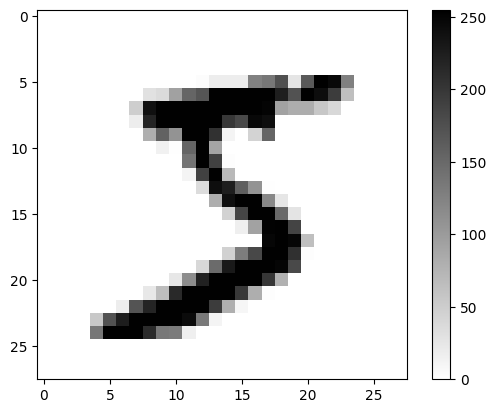

분류: 5


In [4]:
plt.figure()
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
print("분류:", Y_train[0])

* 101번째 학습데이터 (인덱스 100)의 이미지
  * 분류된 범주는 5: 숫자 5

In [7]:
X_train[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,  18,  46, 136, 136, 244, 255, 241, 103,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,  94,
        163, 253, 253, 253, 253, 238, 218, 204,  35,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131, 253,
        253, 253, 253, 237, 200,  57,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 246, 253,
        247, 108,  65,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207, 253, 253,
        230,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 157, 253, 253,
        125,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 250,
         57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 247,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 247,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 247,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 231, 249,
         34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 225, 253,
        231, 213, 213, 123,  16,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 172, 253,
        253, 253, 253, 253, 190,  63,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 116,
         72, 124, 209, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  25, 219, 253, 206,   3,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 104, 246, 253,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 213, 253,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  26, 226, 253,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

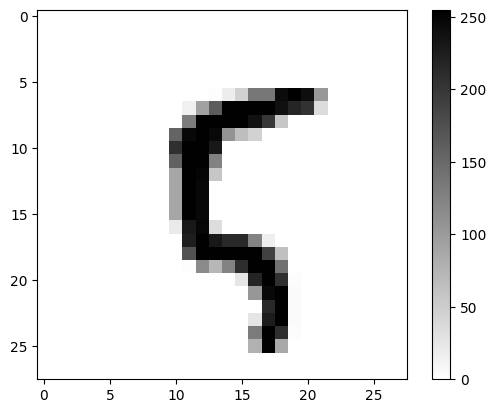

분류: 5


In [8]:
plt.figure()
plt.imshow(X_train[100], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
print("분류:", Y_train[100])

* 이미지 데이터 전처리하기
  * 입력변수 X는 (60000, 28, 28) 차원을 (60000, 28*28) 차원으로 변환
  * 출력변수 Y는 원-핫 인코딩

In [9]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("학습데이터 X와 Y의 차원", X_train.shape, Y_train.shape)
print("시험데이터 X와 Y의 차원", X_test.shape, Y_test.shape)

학습데이터 X와 Y의 차원 (60000, 784) (60000, 10)
시험데이터 X와 Y의 차원 (10000, 784) (10000, 10)


In [10]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [11]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

* 다층 퍼셉트론 모델 설정

In [16]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1])) # Layer 1
model.add(Dense(256, activation='relu'))                             # Layer 2
model.add(Dense(128, activation='relu'))                             # Layer 3
model.add(Dense(64, activation='relu'))                             # Layer 4
model.add(Dense(Y_train.shape[1], activation='softmax'))             # Layer 5
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

* 학습데이터를 이용한 모델 학습

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy를 가장 작게 만드는 59만개의 파라미터 추정
history = model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7864 - loss: 4.0074 - val_accuracy: 0.9312 - val_loss: 0.2749
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9451 - loss: 0.1990 - val_accuracy: 0.9449 - val_loss: 0.2097
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9668 - loss: 0.1116 - val_accuracy: 0.9499 - val_loss: 0.2058
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9701 - loss: 0.1022 - val_accuracy: 0.9563 - val_loss: 0.1969
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9770 - loss: 0.0763 - val_accuracy: 0.9617 - val_loss: 0.1671
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9777 - loss: 0.0689 - val_accuracy: 0.9614 - val_loss: 0.1742
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9778 - loss: 0.0764 - val_accuracy: 0.9635 - val_loss: 0.1661
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9808 - loss: 0.0649 - 

In [18]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9780 - loss: 0.2837


[0.23356807231903076, 0.9824000000953674]

* 시험데이터를 이용한 모델 평가
  * 학습데이터 교차엔트로피 0.000, 정확도 100.00%
  * 검증데이터 교차엔트로피 0.2377, 정확도 98.25%
  * 시험데이터 교차엔트로피 0.2837, 정확도 97.80%
* 전반적으로 좋은 성능이지만 학습데이터를 이용한 경우와 성능 차이가 있음

* 에폭별 비용함수(교차엔트로피) 값의 변화

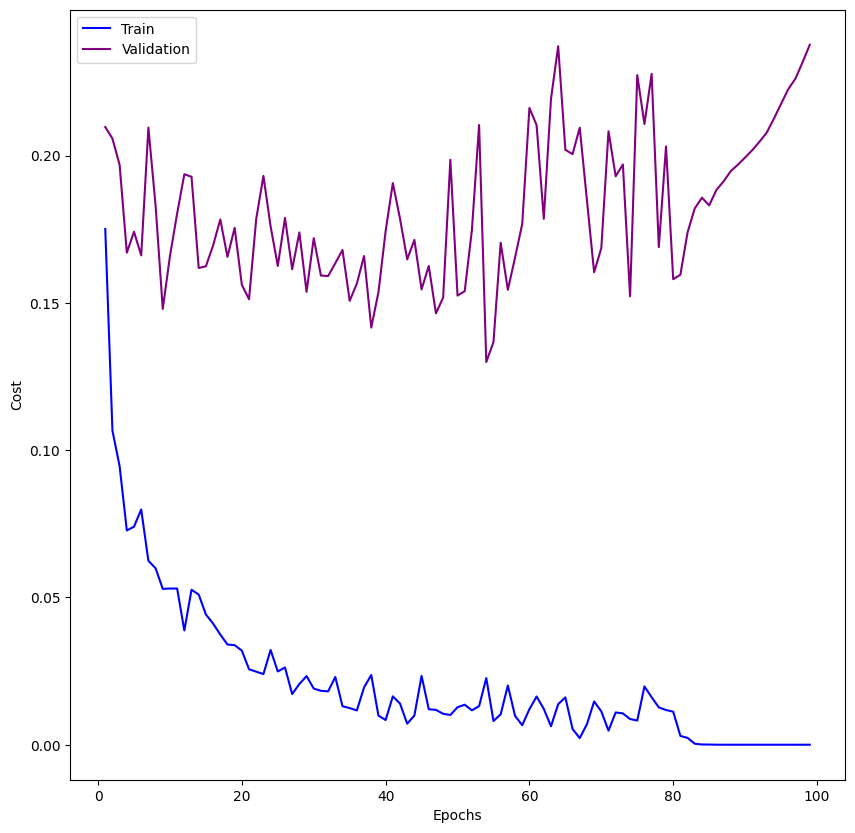

In [20]:
plt.figure(figsize=(10,10)) # epoch 2부터
plt.plot(range(1,100), history.history['loss'][1:], label='Train', color='blue')
plt.plot(range(1,100), history.history['val_loss'][1:], label='Validation', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

1. 학습데이터
  * Train loss는 계속 감소하며 0에 수렴
  * 모델이 학습데이터를 완벽하게 학습
2. 검증데이터
  * 초반에는 감소하다가 이후에는 다시 증가
  * 후반부에는 급격한 상승
  * 학습데이터와 검증데이터의 loss 차이가 매우 큼
3. 문제점
  * 모델이 학습데이터에만 과도하게 최적화됨
  * 새로운 데이터에 대한 일반화 성능이 떨어짐
4. 해결방법
  * Early Stopping 추가
  * 가중치 규제 추가
  * Dropout 추가


* 다층퍼셉트론 모델 설정
  * 조기 중단 기법 적용

In [37]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1])) # Layer 1
model.add(Dense(256, activation='relu'))                             # Layer 2
model.add(Dense(128, activation='relu'))                             # Layer 3
model.add(Dense(64, activation='relu'))                             # Layer 4
model.add(Dense(Y_train.shape[1], activation='softmax'))             # Layer 5
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7779 - loss: 3.5190 - val_accuracy: 0.9288 - val_loss: 0.2851
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9408 - loss: 0.2144 - val_accuracy: 0.9492 - val_loss: 0.2104
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9625 - loss: 0.1313 - val_accuracy: 0.9530 - val_loss: 0.1838
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9713 - loss: 0.0921 - val_accuracy: 0.9607 - val_loss: 0.1680
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9749 - loss: 0.0787 - val_accuracy: 0.9545 - val_loss: 0.1843
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9764 - loss: 0.0748 - val_accuracy: 0.9539 - val_loss: 0.2059
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9786 - loss: 0.0690 - val_accuracy: 0.9652 - val_loss: 0.1624
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9791 - loss: 0.0673 - 

In [39]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1634


[0.1456993669271469, 0.9703999757766724]

* 시험데이터를 이용한 모델 평가
  * 학습데이터 교차엔트로피 0.0174, 정확도 99.56%
  * 검증데이터 교차엔트로피 0.1387 정확도 97.99%
  * 시험데이터 교차엔트로피 0.1595, 정확도 97.57%

* 에폭별 비용함수(교차엔트로피) 값의 변화

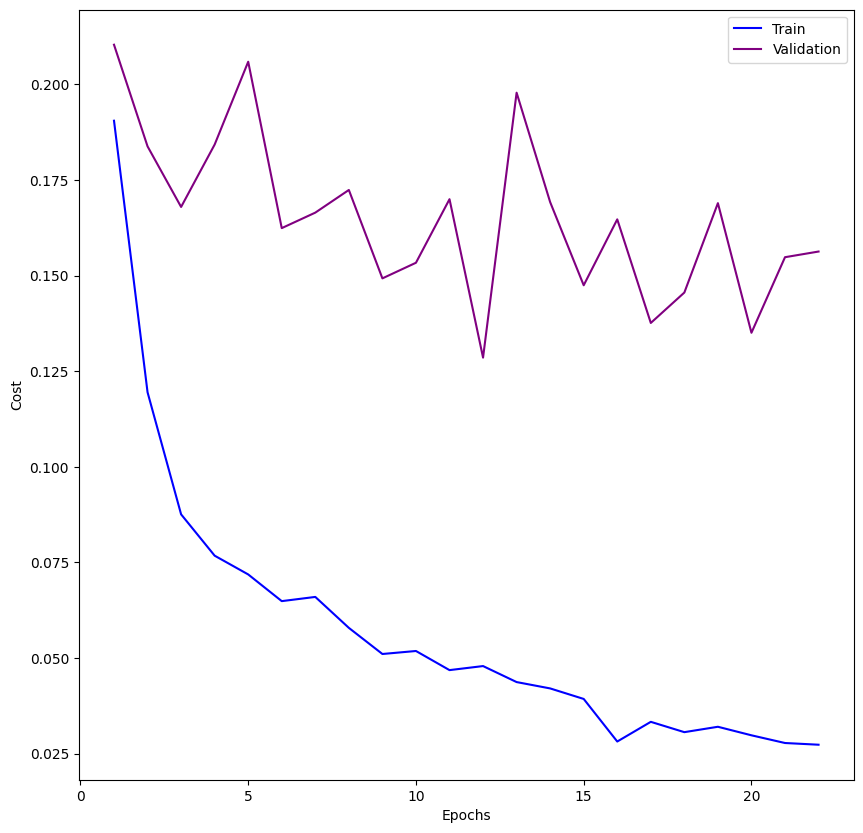

In [40]:
plt.figure(figsize=(10,10)) # epoch 2부터
plt.plot(range(1,len(history.history['loss'])), history.history['loss'][1:], label='Train', color='blue')
plt.plot(range(1,len(history.history['val_loss'])), history.history['val_loss'][1:], label='Validation', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

1. 과적합 문제가 기존 모델보다 해결됨
  * 두 데이터의 loss 간의 격차가 이전보다 작아짐
2. 조기중단이 제대로 작동됨
  * Validation loss가 더이상 개선되지 아노는 시점에서 학습 중단
  * 약 45번째 epoch에서 학습이 중단되었으며 이는 100 epoch를 모두 학습하는 것보다 효율적
3. Validatio loss의 변동성
  * 하지만 여전히 0.13과 0.18 사이에서 진동하며 불안정성이 있음

* 다층 퍼셉트론 모델 설정
  * L2 가중치 규제 사용: kernel_regularizer='l2'
  * $w^1$, $w^2$, $w^3$ 가중치 규제하고, $w^4$는 하지 않음

In [28]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1], kernel_regularizer='l2')) # Layer 1
model.add(Dense(256, activation='relu', kernel_regularizer='l2'))                             # Layer 2
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))                             # Layer 3
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))                              # Layer 4
model.add(Dense(Y_train.shape[1], activation='softmax'))                                      # Layer 5
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

* 학습데이터를 이용한 모델 학습

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7881 - loss: 13.8521 - val_accuracy: 0.9394 - val_loss: 6.5162
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9420 - loss: 5.8444 - val_accuracy: 0.9549 - val_loss: 4.2029
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9636 - loss: 3.7629 - val_accuracy: 0.9605 - val_loss: 2.7887
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9695 - loss: 2.5054 - val_accuracy: 0.9647 - val_loss: 1.8992
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9720 - loss: 1.7137 - val_accuracy: 0.9680 - val_loss: 1.3228
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9731 - loss: 1.2042 - val_accuracy: 0.9682 - val_loss: 0.9578
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9717 - loss: 0.8809 - val_accuracy: 0.9660 - val_loss: 0.7277
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9704 - loss: 0.6705 -

In [30]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9433 - loss: 0.2776


[0.25763779878616333, 0.949400007724762]

* 시험데이터를 이용한 모델 평가
  * 학습데이터 교차엔트로피 0.1860, 정확도 95.03%
  * 검증데이터 교차엔트로피 0.2594, 정확도 95.03%
  * 시험데이터 교차엔트로피 0.2776, 정확도 94.33%
  * 가중치 규제 후 학습데이터와 검증데이터, 시험데이터 간의 성능 차이가 많이 줄어들었음

* 에폭별 비용함수(교차엔트로피) 값의 변화


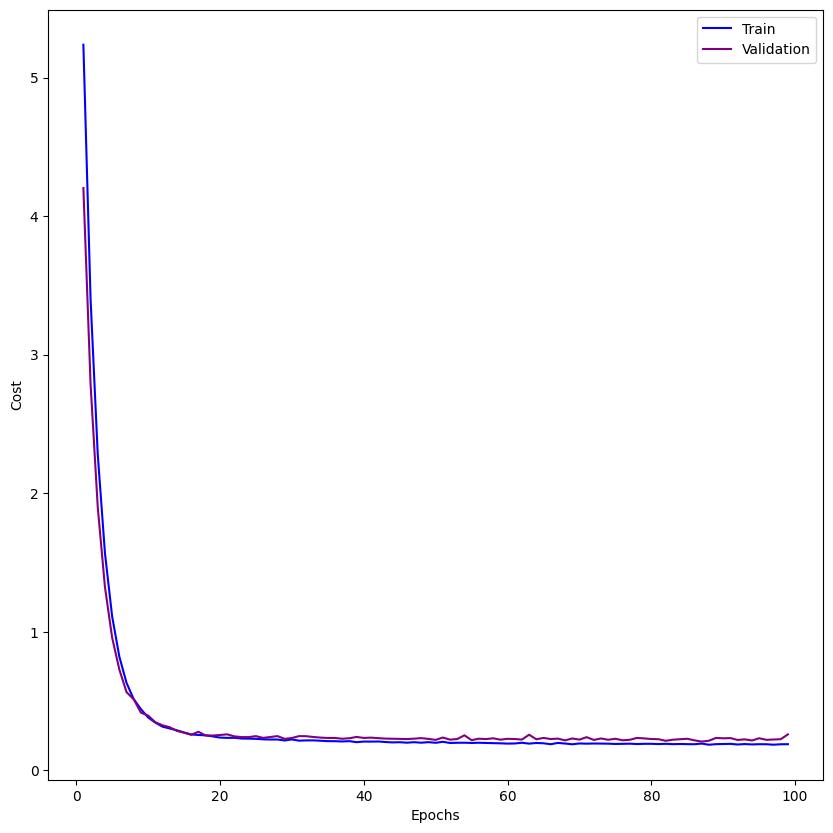

In [32]:
plt.figure(figsize=(10,10)) # epoch 2부터
plt.plot(range(1,100), history.history['loss'][1:], label='Train', color='blue')
plt.plot(range(1,100), history.history['val_loss'][1:], label='Validation', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

1. 이상적인 학습 패턴
  * Train loss와 Validation loss가 거의 동일하게 감소
  * 과적합이 거의 없음
2. 안정적인 수렴
  * 초반 급격한 감소 후 약 20 epoch부터 안정화
  * 변동성이 거의 없고 매끄럽게 감소


* 다층 퍼셉트론 모델 설정
  * 드롭아웃 사용: Dropout 층을 추가하는 방식

In [41]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1])) # Layer 1, Dropout
model.add(Dropout(0.2)) # 512개 유닛 중 20% 랜덤하게 삭제
model.add(Dense(256, activation='relu'))                             # Layer 2, Dropout
model.add(Dropout(0.2)) # 256개 유닛 중 20% 랜덤하게 삭제
model.add(Dense(128, activation='relu'))                             # Layer 3, Dropout
model.add(Dropout(0.2)) # 64개 유닛 중 20% 랜덤하게 삭제
model.add(Dense(64, activation='relu'))                              # Layer 4
model.add(Dense(Y_train.shape[1], activation='softmax'))             # Layer 5
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

* 학습데이터를 이용한 모델 학습

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_split=0.25)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5796 - loss: 6.8608 - val_accuracy: 0.9117 - val_loss: 0.3129
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8585 - loss: 0.5095 - val_accuracy: 0.9417 - val_loss: 0.2143
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9084 - loss: 0.3291 - val_accuracy: 0.9516 - val_loss: 0.1727
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9276 - loss: 0.2579 - val_accuracy: 0.9577 - val_loss: 0.1541
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9423 - loss: 0.2040 - val_accuracy: 0.9615 - val_loss: 0.1403
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9497 - loss: 0.1762 - val_accuracy: 0.9655 - val_loss: 0.1281
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9562 - loss: 0.1521 - val_accuracy: 0.9658 - val_loss: 0.1303
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9603 - loss: 0.1460 - 

In [43]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9808 - loss: 0.1481


[0.12734897434711456, 0.9836999773979187]

* 시험데이터를 이용한 모델 평가
  * 학습데이터 교차엔트로피 0.0224, 정확도 99.6%
  * 검증데이터 교차엔트로피 0.1628, 정확도 97.96%
  * 시험데이터 교차엔트로피 0.1481, 정확도 98.08%
  * 교차엔트로피가 좋아짐 -> 예측력이 좋아짐


* 에폭별 비용함수(교차엔트로피) 값의 변화

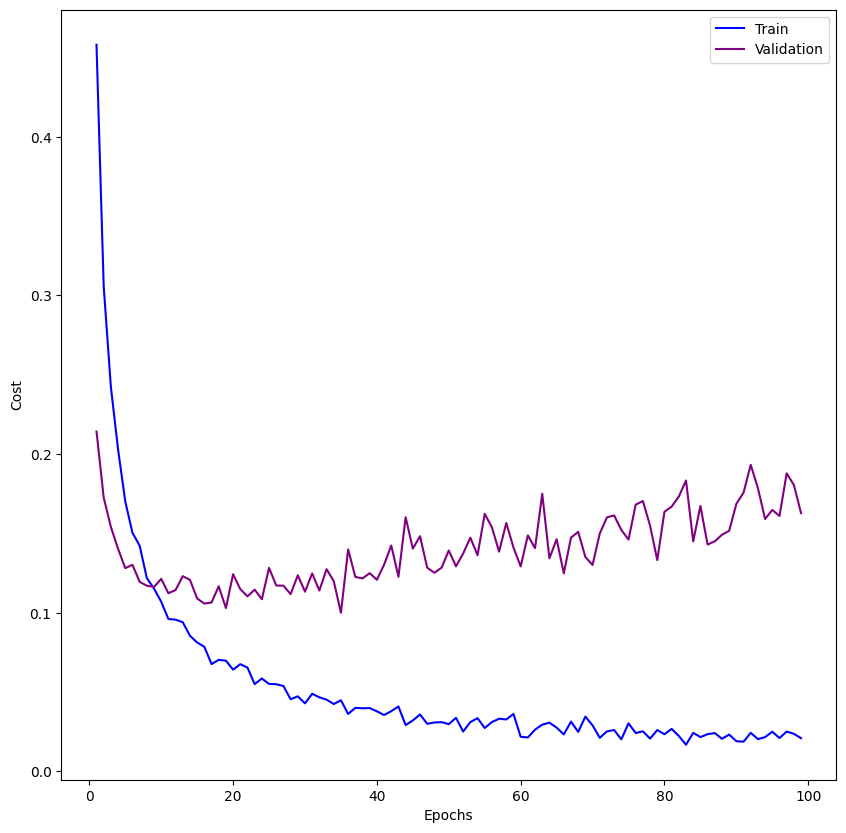

In [45]:
plt.figure(figsize=(10,10)) # epoch 2부터
plt.plot(range(1,100), history.history['loss'][1:], label='Train', color='blue')
plt.plot(range(1,100), history.history['val_loss'][1:], label='Validation', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

1. 학습데이터
  * Train loss는 계속 감소하며 거의 0에 수렵
2. 검증데이터
  * loss가 감소하다가 약 epoch 40 이후 다시 상승
3. 과적합
  * Dropout 층을 추가했지만 과적합을 완전히 해결하지 못함

## 결론
* l2 가중치 규젤ㄹ 한 모델이 학습에 가장 적합하다고 생각함.
* Train loss와 Validation loss가 거의 완벽하게 일치하며 감소하는 패턴을 보였으며 과적합이 어느정도 해결된 것으로 보임
* 모델이 새로운 데이터에서도 잘 일반화 될 것으로 예상 됨